<a href="https://colab.research.google.com/github/vatsbalar22/Stock-prediction-ML-DL-MLOps-Flask/blob/main/colab_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model train with Deep Learnig

# Data extract through API

In [1]:
# from alpha_vantage.timeseries import TimeSeries
# api_key = 'RDW63LUED9U3S55M'
# symbol = 'RELIANCE.BSE'

# def get_stock_data(symbol, api_key):
#     ts = TimeSeries(key=api_key, output_format='pandas')
#     data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
#     return data
# def prepare_data(data):
#     data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
#     data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
#     return data

# data = get_stock_data(symbol,api_key)
# df = prepare_data(data)



In [2]:
# Get accurate data using yfinance library
# Give symbol and start and end date

import yfinance as yf
from datetime import datetime

symbol='RELIANCE.BO'
start_date = "2005-01-03"
end_date = datetime.today().strftime('%Y-%m-%d')
df = yf.download(symbol ,start=start_date , end= end_date)


[*********************100%%**********************]  1 of 1 completed


### DATA Preprocessing if we are using yfinance library

In [3]:
df =df.reset_index()
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,130.012497,136.125000,130.012497,135.774994,99.178894,11731288
1,2005-01-04,133.750000,136.237503,132.375000,132.699997,96.932716,9965116
2,2005-01-05,131.375000,133.500000,129.062500,132.475006,96.768356,16794452
3,2005-01-06,131.250000,134.125000,130.649994,131.487503,96.047050,13319768
4,2005-01-07,132.000000,136.875000,131.887497,135.212494,98.768028,16809884
...,...,...,...,...,...,...,...
4700,2024-02-28,2964.899902,2982.000000,2900.550049,2909.000000,2909.000000,64333
4701,2024-02-29,2931.050049,2958.000000,2909.550049,2924.750000,2924.750000,192376
4702,2024-03-01,2916.699951,2999.000000,2916.699951,2986.000000,2986.000000,544407
4703,2024-03-04,2981.000000,3024.800049,2975.050049,3011.600098,3011.600098,139795


In [4]:
# Add more features to improve accuracy and drop null value

df['Tommorow']= df['Close'].shift(1)
df.dropna(inplace=True)
df['Target']=(df['Close']>df['Tommorow']).astype(int)

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Tommorow,Target
1,2005-01-04,133.750000,136.237503,132.375000,132.699997,96.932716,9965116,135.774994,0
2,2005-01-05,131.375000,133.500000,129.062500,132.475006,96.768356,16794452,132.699997,0
3,2005-01-06,131.250000,134.125000,130.649994,131.487503,96.047050,13319768,132.475006,0
4,2005-01-07,132.000000,136.875000,131.887497,135.212494,98.768028,16809884,131.487503,1
5,2005-01-10,136.949997,138.449997,132.562500,133.375000,97.425789,8666480,135.212494,0
...,...,...,...,...,...,...,...,...,...
4700,2024-02-28,2964.899902,2982.000000,2900.550049,2909.000000,2909.000000,64333,2970.399902,0
4701,2024-02-29,2931.050049,2958.000000,2909.550049,2924.750000,2924.750000,192376,2909.000000,1
4702,2024-03-01,2916.699951,2999.000000,2916.699951,2986.000000,2986.000000,544407,2924.750000,1
4703,2024-03-04,2981.000000,3024.800049,2975.050049,3011.600098,3011.600098,139795,2986.000000,1


#Data visualization

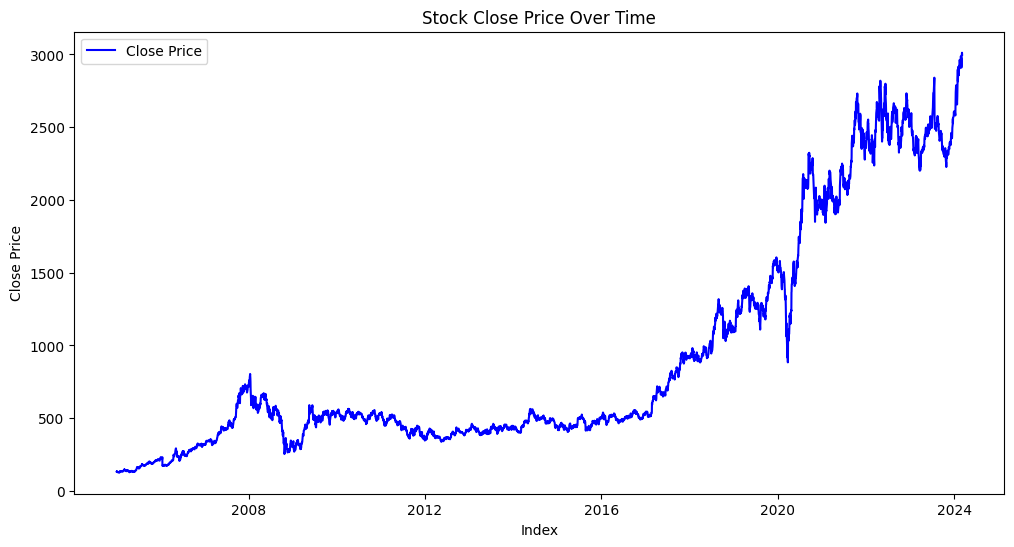

In [6]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Data Analysis

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Tommorow,Target
count,4704.000000,4704.000000,4704.000000,4704.000000,4704.000000,4.704000e+03,4704.000000,4704.000000
mean,913.923684,924.323883,902.852379,913.140250,878.193739,2.951349e+06,912.531720,0.515094
std,768.911830,775.932575,761.122810,768.232054,783.397196,2.051336e+07,767.713564,0.499825
min,126.250000,127.587502,124.550003,125.349998,91.563805,4.087400e+04,125.349998,0.000000
25%,422.693756,427.487503,417.250000,421.821869,375.993202,4.182222e+05,421.724998,0.000000
50%,514.424988,520.774994,507.675003,513.962494,466.076660,8.616090e+05,513.862488,1.000000
75%,1253.000000,1270.512482,1235.500000,1252.174988,1244.020660,2.513520e+06,1251.925018,1.000000
max,3011.699951,3024.800049,2975.050049,3011.600098,3011.600098,7.946226e+08,3011.600098,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4704 entries, 1 to 4704
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4704 non-null   datetime64[ns]
 1   Open       4704 non-null   float64       
 2   High       4704 non-null   float64       
 3   Low        4704 non-null   float64       
 4   Close      4704 non-null   float64       
 5   Adj Close  4704 non-null   float64       
 6   Volume     4704 non-null   int64         
 7   Tommorow   4704 non-null   float64       
 8   Target     4704 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 367.5 KB


<ipython-input-9-7cb9daedfff5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


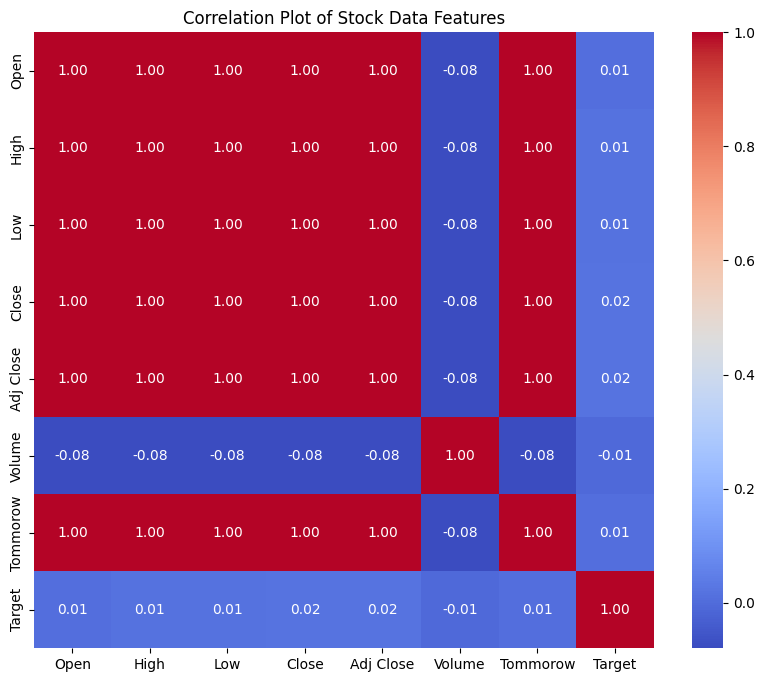

In [9]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [10]:
# Drop the 'Date' column from the DataFrame
df.drop(df.columns[[0,5]] , axis=1 , inplace=True)


In [11]:
df

,Open,High,Low,Close,Volume,Tommorow,Target
1,133.750000,136.237503,132.375000,132.699997,9965116,135.774994,0
2,131.375000,133.500000,129.062500,132.475006,16794452,132.699997,0
3,131.250000,134.125000,130.649994,131.487503,13319768,132.475006,0
4,132.000000,136.875000,131.887497,135.212494,16809884,131.487503,1
5,136.949997,138.449997,132.562500,133.375000,8666480,135.212494,0
...,...,...,...,...,...,...,...
4700,2964.899902,2982.000000,2900.550049,2909.000000,64333,2970.399902,0
4701,2931.050049,2958.000000,2909.550049,2924.750000,192376,2909.000000,1
4702,2916.699951,2999.000000,2916.699951,2986.000000,544407,2924.750000,1
4703,2981.000000,3024.800049,2975.050049,3011.600098,139795,2986.000000,1


In [12]:

# Split the data into features (X) and target (y)
x = df.drop(columns=['Target'])  # Features are all columns except 'Market_High_Indicator'
y = df['Target']  # Target column is 'Market_High_Indicator'

# Now, you can use X and y for further processing, such as training and testing your model

#Model training

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Now, you can use X_train, X_test, y_train, and y_test for training and evaluating your model

In [14]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train)



In [15]:
X_train.shape

(3763, 6)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=6),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
95/95 [==============================] - 4s 9ms/step - loss: 20809.3262 - accuracy: 0.4950 - val_loss: 8785.2871 - val_accuracy: 0.4900
Epoch 2/10
95/95 [==============================] - 1s 7ms/step - loss: 6735.4639 - accuracy: 0.5120 - val_loss: 24846.6504 - val_accuracy: 0.4900
Epoch 3/10
95/95 [==============================] - 0s 5ms/step - loss: 6529.0034 - accuracy: 0.5017 - val_loss: 10195.9766 - val_accuracy: 0.5100
Epoch 4/10
95/95 [==============================] - 0s 5ms/step - loss: 24465.8906 - accuracy: 0.5043 - val_loss: 81709.4219 - val_accuracy: 0.4900
Epoch 5/10
95/95 [==============================] - 0s 4ms/step - loss: 37244.6797 - accuracy: 0.4940 - val_loss: 4502.4453 - val_accuracy: 0.4954
Epoch 6/10
95/95 [==============================] - 0s 5ms/step - loss: 31064.9453 - accuracy: 0.4944 - val_loss: 4695.7798 - val_accuracy: 0.4967
Epoch 7/10
95/95 [==============================] - 1s 5ms/step - loss: 26651.7441 - accuracy: 0.4924 - val_loss: 634

#Predict next day high

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Your original array
last_row_features = df.drop(columns=['Target']).iloc[-1]
last_row_features_array = np.array(last_row_features)

# Reshape the array to a 2D array (required by MinMaxScaler)
last_row_features_array = last_row_features_array.reshape(-1, 1)

# Create the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
features_scaled_array = scaler.fit_transform(last_row_features_array)
features_scaled_array_reshaped = features_scaled_array.reshape(1, -1)

In [20]:
# Make predictions
next_day_prediction = model.predict(features_scaled_array_reshaped)

# Convert the prediction to binary (0 or 1)
next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)


1/1 [==============================] - 0s 422ms/step
Predicted Market High Indicator for the Next Day: 1


In [21]:
# from sklearn.linear_model import LogisticRegression

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Once trained, you can use the model to make predictions on the test data
# y_pred = model.predict(X_test)



In [22]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [23]:
# # Extract features from the last row of your dataset
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]

# # Reshape the features array as scikit-learn expects a 2D array
# last_row_features = last_row_features.values.reshape(1, -1)

# # Predict the next day's market high indicator
# next_day_prediction = model.predict(last_row_features)

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction[0])


In [24]:
# # Predict the next day's market high indicator
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]
# last_row_features = last_row_features.values.reshape(1, -1)
# next_day_prediction = model.predict(last_row_features)

# # Convert the prediction to binary (0 or 1)
# next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)
